In [ ]:
!pip install pyyaml==5.1

     |████████████████████████████████| 274 kB 14.3 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=795831886b67cc9b0ef78d51e2ff59c0d95365ad35bd4953a4a1000dfc71b7c7
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html
     |████████████████████████████████| 6.4 MB 618 kB/s 
     |████████████████████████████████| 145 kB 8.1 MB/s 
     |████████████████████████████████| 49 kB 2.4 MB/s 
     |████████████████████████████████| 74 kB 2.9 MB/s 
     |████████████████████████████████| 130 kB 35.8 MB/s 
     |████████████████████████████████| 743 kB 23.4 MB/s 
     |████████████████████████████████| 745 kB 51.9 MB/s 
     |████████████████████████████████| 112 kB 53.0 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20210825-py3-none-any.whl size=60661 sha256=d51ffdf8812502922d33185758482a6804021610476a619ba2489feffaa0fdea
  Stored in directory: /root/.cache/pip/wheels/53/c4/f8/c4cb07f135845218b019b4a55d8a0470a0f21ee13f8dcd16be
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=1cb1d4fe9568a723a65dc563dc4d6f075fd884aa31b6d7461fd91bff148e8a9

In [ ]:
import torch, torchvision
import matplotlib.pyplot as plt
import json
import cv2
import numpy as np

In [ ]:
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.structures.image_list import ImageList
from detectron2.data import transforms as T
from detectron2.modeling.box_regression import Box2BoxTransform
from detectron2.modeling.roi_heads.fast_rcnn import FastRCNNOutputs
from detectron2.structures.boxes import Boxes
from detectron2.layers import nms
from detectron2 import model_zoo
from detectron2.config import get_cfg

In [ ]:
!wget https://drive.google.com/drive/folders/11UbkeKRskvo5qTevNpbsX9T7Msa9iJuu

--2021-09-15 01:18:06--  https://drive.google.com/drive/folders/11UbkeKRskvo5qTevNpbsX9T7Msa9iJuu
Resolving drive.google.com (drive.google.com)... 142.250.153.102, 142.250.153.113, 142.250.153.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.153.102|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/drive/folders/11UbkeKRskvo5qTevNpbsX9T7Msa9iJuu&followup=https://drive.google.com/drive/folders/11UbkeKRskvo5qTevNpbsX9T7Msa9iJuu [following]
--2021-09-15 01:18:07--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/drive/folders/11UbkeKRskvo5qTevNpbsX9T7Msa9iJuu&followup=https://drive.google.com/drive/folders/11UbkeKRskvo5qTevNpbsX9T7Msa9iJuu
Resolving accounts.google.com (accounts.google.com)... 172.217.218.84, 2a00:1450:4013:c07::54
Connecting to accounts.google.com (accounts.google.com

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.zip to train.zip


In [ ]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5999640.jpg       
  inflating: train/5999647.jpg       
  inflating: train/5999653.jpg       
  inflating: train/5999662.jpg       
  inflating: train/5999676.jpg       
  inflating: train/5999689.jpg       
  inflating: train/5999697.jpg       
  inflating: train/59997.jpg         
  inflating: train/5999704.jpg       
  inflating: train/5999713.jpg       
  inflating: train/5999719.jpg       
  inflating: train/5999736.jpg       
  inflating: train/5999745.jpg       
  inflating: train/60001.jpg         
  inflating: train/60002.jpg         
  inflating: train/60003.jpg         
  inflating: train/60004.jpg         
  inflating: train/60005.jpg         
  inflating: train/60006.jpg         
  inflating: train/60009.jpg         
  inflating: train/60010.jpg         
  inflating: train/60011.jpg         
  inflating: train/60016.jpg         
  inflating: train/60017.jpg         
  inflating: train/60018.jpg         

In [ ]:
!unzip images.zip

unzip:  cannot find or open images.zip, images.zip.zip or images.zip.ZIP.


In [ ]:
# img1 = plt.imread('0.png')

In [ ]:
# img_bgr1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)

In [ ]:
# print(img1.shape)

(195, 203, 3)


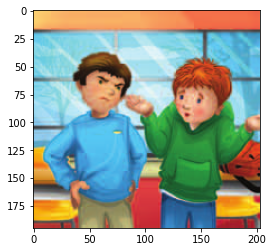

In [ ]:
# plt.imshow(img1)
# plt.show()

In [ ]:
cfg_path = "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"

def load_config_and_model_weights(cfg_path):
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file(cfg_path))

    # ROI HEADS SCORE THRESHOLD
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

    # Comment the next line if you're using 'cuda'
    cfg['MODEL']['DEVICE']='cpu'

    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(cfg_path)

    return cfg

cfg = load_config_and_model_weights(cfg_path)

In [ ]:
cfg

CfgNode({'VERSION': 2, 'MODEL': CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': True, 'KEYPOINT_ON': False, 'DEVICE': 'cpu', 'META_ARCHITECTURE': 'GeneralizedRCNN', 'WEIGHTS': 'https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x/138205316/model_final_a3ec72.pkl', 'PIXEL_MEAN': [103.53, 116.28, 123.675], 'PIXEL_STD': [1.0, 1.0, 1.0], 'BACKBONE': CfgNode({'NAME': 'build_resnet_fpn_backbone', 'FREEZE_AT': 2}), 'FPN': CfgNode({'IN_FEATURES': ['res2', 'res3', 'res4', 'res5'], 'OUT_CHANNELS': 256, 'NORM': '', 'FUSE_TYPE': 'sum'}), 'PROPOSAL_GENERATOR': CfgNode({'NAME': 'RPN', 'MIN_SIZE': 0}), 'ANCHOR_GENERATOR': CfgNode({'NAME': 'DefaultAnchorGenerator', 'SIZES': [[32], [64], [128], [256], [512]], 'ASPECT_RATIOS': [[0.5, 1.0, 2.0]], 'ANGLES': [[-90, 0, 90]], 'OFFSET': 0.0}), 'RPN': CfgNode({'HEAD_NAME': 'StandardRPNHead', 'IN_FEATURES': ['p2', 'p3', 'p4', 'p5', 'p6'], 'BOUNDARY_THRESH': -1, 'IOU_THRESHOLDS': [0.3, 0.7], 'IOU_LABELS': [0, -1, 1], 'BATCH_SIZ

In [ ]:
def get_model(cfg):
    # build model
    model = build_model(cfg)

    # load weights
    checkpointer = DetectionCheckpointer(model)
    checkpointer.load(cfg.MODEL.WEIGHTS)

    # eval mode
    model.eval()
    return model

model = get_model(cfg)

model_final_a3ec72.pkl: 254MB [00:21, 11.8MB/s]                           
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [ ]:
def prepare_image_inputs(cfg, img_list):
    # Resizing the image according to the configuration
    transform_gen = T.ResizeShortestEdge(
                [cfg.INPUT.MIN_SIZE_TEST, cfg.INPUT.MIN_SIZE_TEST], cfg.INPUT.MAX_SIZE_TEST
            )
    img_list = [transform_gen.get_transform(img).apply_image(img) for img in img_list]

    # Convert to C,H,W format
    convert_to_tensor = lambda x: torch.Tensor(x.astype("float32").transpose(2, 0, 1))

    batched_inputs = [{"image":convert_to_tensor(img), "height": img.shape[0], "width": img.shape[1]} for img in img_list]

    # Normalizing the image
    num_channels = len(cfg.MODEL.PIXEL_MEAN)
    pixel_mean = torch.Tensor(cfg.MODEL.PIXEL_MEAN).view(num_channels, 1, 1)
    pixel_std = torch.Tensor(cfg.MODEL.PIXEL_STD).view(num_channels, 1, 1)
    normalizer = lambda x: (x - pixel_mean) / pixel_std
    images = [normalizer(x["image"]) for x in batched_inputs]

    # Convert to ImageList
    images =  ImageList.from_tensors(images,model.backbone.size_divisibility)
    # images, batched_inputs = images.to('cuda'), batched_inputs.to('cuda')
    return images, batched_inputs

# images, batched_inputs = prepare_image_inputs(cfg, [img_bgr1])

In [ ]:
# batched_inputs

In [ ]:
# images

In [ ]:
def get_features(model, images):
    features = model.backbone(images.tensor)
    return features

# features = get_features(model, images)

In [ ]:
# features.keys()

In [ ]:
# plt.imshow(cv2.resize(img1, (images.tensor.shape[-2:][::-1])))
# plt.show()
# for key in features.keys():
#     print(features[key].shape)
#     plt.imshow(features[key][0,0,:,:].squeeze().detach().numpy(), cmap='jet')
#     plt.show()

In [ ]:
def get_proposals(model, images, features):
    proposals, _ = model.proposal_generator(images, features)
    return proposals

# proposals = get_proposals(model, images, features)

In [ ]:
def get_box_features(model, features, proposals):
    features_list = [features[f] for f in ['p2', 'p3', 'p4', 'p5']]
    box_features = model.roi_heads.box_pooler(features_list, [x.proposal_boxes for x in proposals])
    box_features = model.roi_heads.box_head.flatten(box_features)
    box_features = model.roi_heads.box_head.fc1(box_features)
    box_features = model.roi_heads.box_head.fc_relu1(box_features)
    box_features = model.roi_heads.box_head.fc2(box_features)

    box_features = box_features.reshape(1, 1000, 1024) # depends on your config and batch size
    return box_features, features_list

# box_features, features_list = get_box_features(model, features, proposals)

In [ ]:
def get_prediction_logits(model, features_list, proposals):
    cls_features = model.roi_heads.box_pooler(features_list, [x.proposal_boxes for x in proposals])
    cls_features = model.roi_heads.box_head(cls_features)
    pred_class_logits, pred_proposal_deltas = model.roi_heads.box_predictor(cls_features)
    return pred_class_logits, pred_proposal_deltas

# pred_class_logits, pred_proposal_deltas = get_prediction_logits(model, features_list, proposals)

In [ ]:
def get_box_scores(cfg, pred_class_logits, pred_proposal_deltas):
    box2box_transform = Box2BoxTransform(weights=cfg.MODEL.ROI_BOX_HEAD.BBOX_REG_WEIGHTS)
    smooth_l1_beta = cfg.MODEL.ROI_BOX_HEAD.SMOOTH_L1_BETA

    outputs = FastRCNNOutputs(
        box2box_transform,
        pred_class_logits,
        pred_proposal_deltas,
        proposals,
        smooth_l1_beta,
    )

    boxes = outputs.predict_boxes()
    scores = outputs.predict_probs()
    image_shapes = outputs.image_shapes

    return boxes, scores, image_shapes

# boxes, scores, image_shapes = get_box_scores(cfg, pred_class_logits, pred_proposal_deltas)

In [ ]:
def get_output_boxes(boxes, batched_inputs, image_size):
    proposal_boxes = boxes.reshape(-1, 4)
    scale_x, scale_y = (batched_inputs["width"] / image_size[1], batched_inputs["height"] / image_size[0])
    output_boxes = Boxes(proposal_boxes)

    # output_boxes.scale(scale_x, scale_y)
    # output_boxes.clip(image_size)

    return output_boxes

# output_boxes = [get_output_boxes(boxes[i], batched_inputs[i], proposals[i].image_size) for i in range(len(proposals))]

In [ ]:
# proposals[0].image_size

In [ ]:
# output_boxes

In [ ]:
def select_boxes(cfg, output_boxes, scores):
    test_score_thresh = cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST
    test_nms_thresh = cfg.MODEL.ROI_HEADS.NMS_THRESH_TEST
    cls_prob = scores.detach()
    cls_boxes = output_boxes.tensor.detach().reshape(1000,80,4)
    max_conf = torch.zeros((cls_boxes.shape[0]))
    for cls_ind in range(0, cls_prob.shape[1]-1):
        cls_scores = cls_prob[:, cls_ind+1]
        det_boxes = cls_boxes[:,cls_ind,:]
        keep = np.array(nms(det_boxes, cls_scores, test_nms_thresh))
        max_conf[keep] = torch.where(cls_scores[keep] > max_conf[keep], cls_scores[keep], max_conf[keep])
    keep_boxes = torch.where(max_conf >= test_score_thresh)[0]
    return keep_boxes, max_conf

In [ ]:
# temp = [select_boxes(cfg, output_boxes[i], scores[i]) for i in range(len(scores))]
# keep_boxes, max_conf = [],[]
# for keep_box, mx_conf in temp:
#     keep_boxes.append(keep_box)
#     max_conf.append(mx_conf)

In [ ]:
# MIN_BOXES=10
# MAX_BOXES=100
def filter_boxes(keep_boxes, max_conf, min_boxes, max_boxes):
    if len(keep_boxes) < min_boxes:
        keep_boxes = np.argsort(max_conf).numpy()[::-1][:min_boxes]
    elif len(keep_boxes) > max_boxes:
        keep_boxes = np.argsort(max_conf).numpy()[::-1][:max_boxes]
    return keep_boxes

# keep_boxes = [filter_boxes(keep_box, mx_conf, MIN_BOXES, MAX_BOXES) for keep_box, mx_conf in zip(keep_boxes, max_conf)]

In [ ]:
def get_visual_embeds(box_features, keep_boxes):
    return box_features[keep_boxes.copy()]

# visual_embeds = [get_visual_embeds(box_feature, keep_box) for box_feature, keep_box in zip(box_features, keep_boxes)]

In [ ]:
from os import listdir
from os.path import isfile, join
image_dir = 'train/'
image_files = [f for f in listdir(image_dir) if isfile(join(image_dir, f))]

In [ ]:
image_files

['4354561.jpg',
 '15077574.jpg',
 '3172286.jpg',
 '9953693.jpg',
 '9857017.jpg',
 '1152122.jpg',
 '9705681.jpg',
 '12949484.jpg',
 '4363830.jpg',
 '12465328.jpg',
 '2616010.jpg',
 '9722331.jpg',
 '1197830.jpg',
 '2440429.jpg',
 '5128834.jpg',
 '13346518.jpg',
 '4453850.jpg',
 '4669841.jpg',
 '1986004.jpg',
 '6806914.jpg',
 '1151668.jpg',
 '7560911.jpg',
 '6881511.jpg',
 '2574647.jpg',
 '1198214.jpg',
 '1901937.jpg',
 '3822374.jpg',
 '6995777.jpg',
 '2044050.jpg',
 '1941063.jpg',
 '5154823.jpg',
 '607425.jpg',
 '10355652.jpg',
 '651457.jpg',
 '1160981.jpg',
 '2423700.jpg',
 '14354615.jpg',
 '4924292.jpg',
 '5121782.jpg',
 '4551757.jpg',
 '2360294.jpg',
 '15085871.jpg',
 '1942467.jpg',
 '14027233.jpg',
 '10860972.jpg',
 '2317092.jpg',
 '315395.jpg',
 '1716885.jpg',
 '14365655.jpg',
 '11753030.jpg',
 '15147423.jpg',
 '1995586.jpg',
 '1582972.jpg',
 '455555.jpg',
 '4705431.jpg',
 '621320.jpg',
 '13176279.jpg',
 '625115.jpg',
 '7175625.jpg',
 '902365.jpg',
 '669178.jpg',
 '1944450.jpg',
 '1

In [ ]:
output_dir = 'image_features'

In [ ]:
import pickle
import os.path


In [ ]:
i = 0
for each_image in image_files:
  if i >= 1000:
    break
  image_path = join(image_dir, each_image)
  print("i: ", i, " image_path: ", image_path)
  i +=1
  img = plt.imread(image_path)
  out_file_name = each_image.split('.')[0] + '.pickle'
  out_file_path = join(output_dir, out_file_name)

  if os.path.exists(out_file_path):
    print("%s already exist", out_file_path)
    continue
  
  try:
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    images, batched_inputs = prepare_image_inputs(cfg, [img_bgr])
    features = get_features(model, images)
    proposals = get_proposals(model, images, features)
    box_features, features_list = get_box_features(model, features, proposals)
    pred_class_logits, pred_proposal_deltas = get_prediction_logits(model, features_list, proposals)
    boxes, scores, image_shapes = get_box_scores(cfg, pred_class_logits, pred_proposal_deltas)
    output_boxes = [get_output_boxes(boxes[i], batched_inputs[i], proposals[i].image_size) for i in range(len(proposals))]
    temp = [select_boxes(cfg, output_boxes[i], scores[i]) for i in range(len(scores))]

    keep_boxes, max_conf = [],[]
    for keep_box, mx_conf in temp:
          keep_boxes.append(keep_box)
          max_conf.append(mx_conf)

    MIN_BOXES=10
    MAX_BOXES=36
    keep_boxes = [filter_boxes(keep_box, mx_conf, MIN_BOXES, MAX_BOXES) for keep_box, mx_conf in zip(keep_boxes, max_conf)]
    visual_embeds = [get_visual_embeds(box_feature, keep_box) for box_feature, keep_box in zip(box_features, keep_boxes)]

    with open(out_file_path, 'wb') as handle:
        pickle.dump(visual_embeds[0], handle)
  
  except Exception as e:
    print("Exception occured for %s", each_image)
    print(e)
  

i:  0  image_path:  train/4354561.jpg
%s already exist image_features/4354561.pickle
i:  1  image_path:  train/15077574.jpg
%s already exist image_features/15077574.pickle
i:  2  image_path:  train/3172286.jpg
%s already exist image_features/3172286.pickle
i:  3  image_path:  train/9953693.jpg
%s already exist image_features/9953693.pickle
i:  4  image_path:  train/9857017.jpg
%s already exist image_features/9857017.pickle
i:  5  image_path:  train/1152122.jpg
%s already exist image_features/1152122.pickle
i:  6  image_path:  train/9705681.jpg
%s already exist image_features/9705681.pickle
i:  7  image_path:  train/12949484.jpg
%s already exist image_features/12949484.pickle
i:  8  image_path:  train/4363830.jpg
%s already exist image_features/4363830.pickle
i:  9  image_path:  train/12465328.jpg
%s already exist image_features/12465328.pickle
i:  10  image_path:  train/2616010.jpg
%s already exist image_features/2616010.pickle
i:  11  image_path:  train/9722331.jpg
%s already exist im

In [ ]:
!zip -r gg_features.zip image_features/

  adding: image_features/ (stored 0%)
  adding: image_features/8380880.pickle (deflated 7%)
  adding: image_features/9639552.pickle (deflated 7%)
  adding: image_features/1986004.pickle (deflated 7%)
  adding: image_features/8919514.pickle (deflated 7%)
  adding: image_features/14430370.pickle (deflated 7%)
  adding: image_features/3089896.pickle (deflated 7%)
  adding: image_features/11141015.pickle (deflated 7%)
  adding: image_features/792890.pickle (deflated 7%)
  adding: image_features/1582719.pickle (deflated 7%)
  adding: image_features/2537938.pickle (deflated 7%)
  adding: image_features/1995193.pickle (deflated 7%)
  adding: image_features/7817093.pickle (deflated 7%)
  adding: image_features/9480318.pickle (deflated 7%)
  adding: image_features/4691337.pickle (deflated 7%)
  adding: image_features/11753030.pickle (deflated 7%)
  adding: image_features/12949484.pickle (deflated 7%)
  adding: image_features/2418319.pickle (deflated 7%)
  adding: image_features/14431512.pickle 

In [ ]:
from google.colab import files
files.download("gg_features.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x = '0.png'
y = x.split('.')[0] + '.pickle'

In [ ]:
_z = join(output_dir, y)

In [ ]:
_z

'image_features/0.pickle'

In [ ]:
a = _image_features_list[0][0]

In [ ]:
import pickle


# save
with open('filename.pickle', 'wb') as handle:
    pickle.dump(a, handle)

# open
with open('filename.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [ ]:
b

tensor([[ 0.6404, -1.3234, -0.3672,  ..., -2.3257,  0.7480,  0.2535],
        [ 0.5277, -1.1945, -0.3681,  ..., -2.0898,  0.8353,  0.6363],
        [-1.3411, -1.2867,  0.3505,  ..., -1.4903, -0.2477,  0.9898],
        ...,
        [-0.4317, -0.8754, -0.8591,  ..., -2.0850,  0.7390, -0.2427],
        [ 0.0130, -0.8970, -0.2641,  ..., -0.9621, -0.2071,  0.6363],
        [-0.0396, -0.9521, -0.3027,  ..., -0.6024, -0.0537,  0.5431]],
       requires_grad=True)